IMAGE CLASSIFICATION FOR A CAT AND DOG DATASET

In [56]:
# Image classification of a cat and dogs dataset
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import math as math

In [57]:
tfds.disable_progress_bar()
builder = tfds.builder('horses_or_humans')
info = builder.info
print(info)
# print(tfds.list_builders())

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\garci\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


In [58]:
ds_train = tfds.load(name="horses_or_humans", split="train")
ds_test = tfds.load(name="horses_or_humans", split="test")

In [59]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])
print(type(train_images[0]))
print(train_images.shape)
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])
print(type(test_images[0]))
print(test_images.shape)

<class 'numpy.ndarray'>
(1027, 300, 300)
<class 'numpy.ndarray'>
(256, 300, 300)


In [60]:
train_images = train_images.reshape(1027, 300, 300, 1)
test_images = test_images.reshape(256, 300, 300, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
# print(train_images[0])
print(train_images.dtype)

float32


Dense layer model

In [61]:
model = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
loss=keras.losses.SparseCategoricalCrossentropy(),
metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

model.evaluate(test_images, test_labels)
# accuracy: 0.5000

Epoch 1/5
33/33 [==============================] - 8s 203ms/step - loss: 20.3004 - accuracy: 0.5463
Epoch 2/5
33/33 [==============================] - 7s 213ms/step - loss: 3.0008 - accuracy: 0.6777
Epoch 3/5
33/33 [==============================] - 6s 193ms/step - loss: 1.7850 - accuracy: 0.7244
Epoch 4/5
33/33 [==============================] - 7s 200ms/step - loss: 3.2827 - accuracy: 0.6563
Epoch 5/5
8/8 [==============================] - 0s 34ms/step - loss: 3.2923 - accuracy: 0.6172


[3.292283058166504, 0.6171875]

Convolutional model

In [62]:
model = keras.Sequential([
keras.layers.AveragePooling2D(6, 3, input_shape = (300, 300, 1)),
keras.layers.Conv2D(64, 3, activation = 'relu'),
keras.layers.Conv2D(32, 3, activation = 'relu'),
keras.layers.MaxPool2D(2, 2),
keras.layers.Dropout(0.5),            
keras.layers.Flatten(),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer = 'adam', 
loss = keras.losses.SparseCategoricalCrossentropy(), 
metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)
model.evaluate(test_images, test_labels)
# accuracy: 0.7461

Epoch 1/5
33/33 [==============================] - 23s 695ms/step - loss: 0.6971 - accuracy: 0.6991
Epoch 2/5
33/33 [==============================] - 23s 682ms/step - loss: 0.2916 - accuracy: 0.8880
Epoch 3/5
33/33 [==============================] - 24s 706ms/step - loss: 0.1183 - accuracy: 0.9552
Epoch 4/5
33/33 [==============================] - 22s 667ms/step - loss: 0.0425 - accuracy: 0.9883
Epoch 5/5
8/8 [==============================] - 1s 165ms/step - loss: 0.8548 - accuracy: 0.8711


[0.8547549843788147, 0.87109375]

Plotting some results

Predicted value: 1


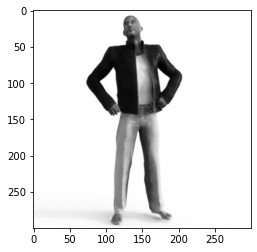

In [71]:
im_num = 19
result = model.predict(np.array([test_images[im_num]]))
# print(result)
predicted_value = np.argmax(result)
print(f'Predicted value: {predicted_value}')

image = test_images[im_num].reshape(300,300)
plt.imshow(image, cmap = 'Greys_r')
plt.show()